<a href="https://colab.research.google.com/github/Riddick4-droid/LLAMA-INDEX-BASIC-TO-ADVANCED/blob/main/Passengerdata_ARIMA(AUTO).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
!pip uninstall -y numpy pmdarima -q

In [1]:
!pip install --only-binary :all: pmdarima==2.0.4

In [2]:
#import libraries
try:
    from statsmodels.tsa.arima.model import ARIMA
    from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
except ModuleNotFoundError:
    print('[INFO] statsmodels not found, installing....')
    !pip install -U statsmodels -q

In [5]:
#import other libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import kagglehub
from kagglehub import KaggleDatasetAdapter
from typing import List

In [7]:
#get passenger data
path = kagglehub.dataset_download(handle='chirag19/air-passengers',path='AirPassengers.csv')
print(path)

/root/.cache/kagglehub/datasets/chirag19/air-passengers/versions/1/AirPassengers.csv


In [8]:
#load data
df = pd.read_csv(f'{path}',index_col='Month',parse_dates=True)

In [9]:
#view data
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


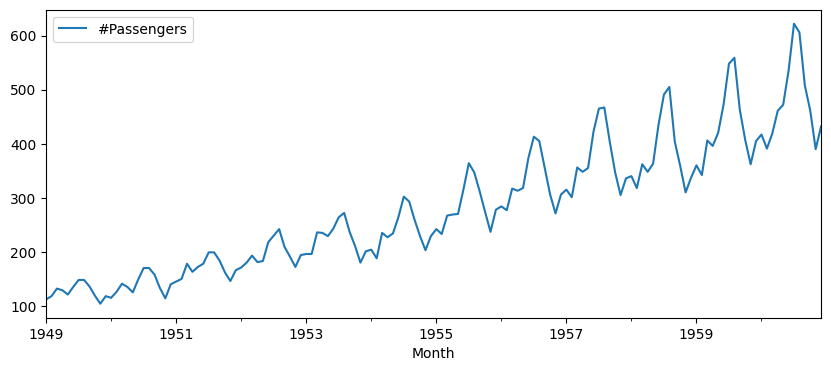

In [10]:
#visualizedata
df.plot(figsize=(10,4));

In [11]:
##clear seasonal trend in the data
##check for stationarity

In [12]:
#define function to check for stationarity
def adf_test(x:List[pd.Series],threshold:float)->str:
    res = adfuller(x)
    print(f'p_value: {res[1]}')
    print(f'test static: {res[0]}')

    if res[1] < threshold:
        return 'Stationary'
    else:
        return 'Not Stationary'

In [13]:
##test on dataset
adf_test(df['#Passengers'],0.05)

p_value: 0.991880243437641
test static: 0.8153688792060498


'Not Stationary'

In [14]:
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [15]:
##aim: to find manually the diff(I) order
df['passengers_diff'] = df['#Passengers'].diff()

In [16]:
df.head()

,#Passengers,passengers_diff
Month,,
1949-01-01,112,NaN
1949-02-01,118,6.0
1949-03-01,132,14.0
1949-04-01,129,-3.0
1949-05-01,121,-8.0


In [17]:
#check for stationary
adf_test(df['passengers_diff'].dropna(),0.05)

p_value: 0.05421329028382478
test static: -2.8292668241700047


'Not Stationary'

In [18]:
df['log_passengers'] = np.log(df['#Passengers'])

In [19]:
df['log_passengers_diff'] = df['log_passengers'].diff()

In [20]:
df.head()

,#Passengers,passengers_diff,log_passengers,log_passengers_diff
Month,,,,
1949-01-01,112,NaN,4.718499,NaN
1949-02-01,118,6.0,4.770685,0.052186
1949-03-01,132,14.0,4.882802,0.112117
1949-04-01,129,-3.0,4.859812,-0.022990
1949-05-01,121,-8.0,4.795791,-0.064022


In [21]:
adf_test(x=df['log_passengers'],threshold=0.05)

p_value: 0.4223667747703874
test static: -1.7170170891069683


'Not Stationary'

In [22]:
adf_test(x=df['log_passengers_diff'].dropna(),threshold=0.05)

p_value: 0.07112054815086184
test static: -2.717130598388114


'Not Stationary'

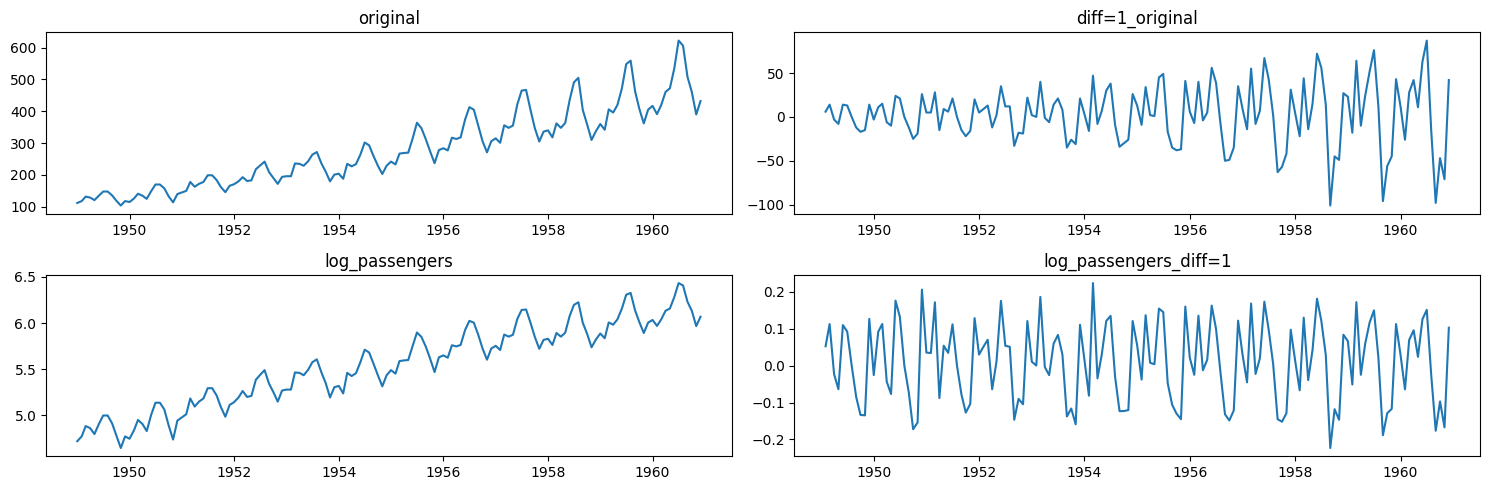

In [23]:
fig,ax=plt.subplots(nrows=2,ncols=2,figsize=(15,5))
ax[0][0].plot(df['#Passengers'],label='original')
ax[0][0].set_title('original')
ax[0][1].plot(df['passengers_diff'],label='diff=1_original')
ax[0][1].set_title('diff=1_original')
ax[1][0].plot(df['log_passengers'],label='log_passengers')
ax[1][0].set_title('log_passengers')
ax[1][1].plot(df['log_passengers_diff'],label='log_passengers_diff=1')
ax[1][1].set_title('log_passengers_diff=1');
plt.tight_layout()

In [24]:
##calculate another diff d=2
df[['passengers_diff_2','log_passengers_diff_2']] = df[['passengers_diff','log_passengers_diff']].diff()

In [25]:
df.head()

,#Passengers,passengers_diff,log_passengers,log_passengers_diff,passengers_diff_2,log_passengers_diff_2
Month,,,,,,
1949-01-01,112,NaN,4.718499,NaN,NaN,NaN
1949-02-01,118,6.0,4.770685,0.052186,NaN,NaN
1949-03-01,132,14.0,4.882802,0.112117,8.0,0.059932
1949-04-01,129,-3.0,4.859812,-0.022990,-17.0,-0.135107
1949-05-01,121,-8.0,4.795791,-0.064022,-5.0,-0.041032


In [26]:
##calculate
adf_test(x=df['log_passengers_diff_2'].dropna(),threshold=0.05)

p_value: 7.419304549376186e-13
test static: -8.19662913218224


'Stationary'

<Axes: xlabel='Month'>

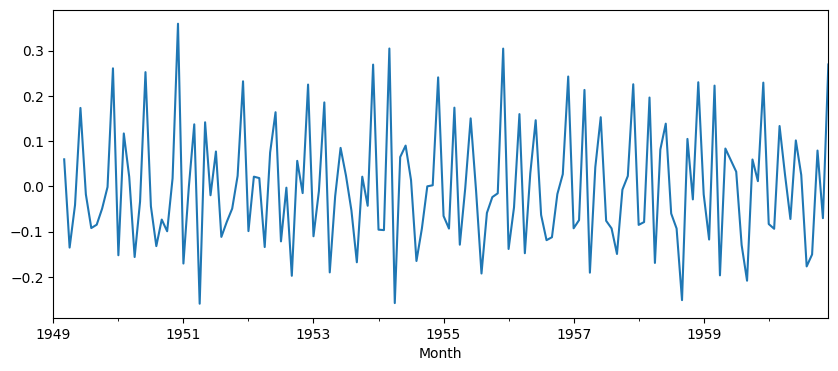

In [27]:
df['log_passengers_diff_2'].plot(figsize=(10,4))

In [28]:
##looks more stationary across the whole series
##indicating a strong stationary sample

In [29]:
adf_test(x=df['passengers_diff_2'].dropna(),threshold=0.05)

p_value: 2.7328918500142026e-29
test static: -16.384231542468513


'Stationary'

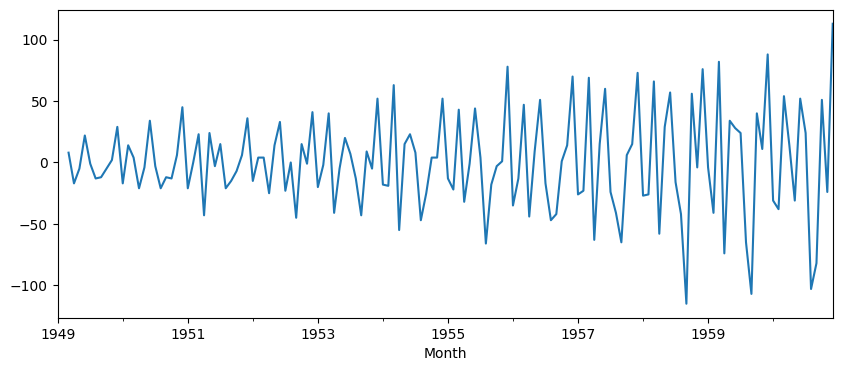

In [30]:
df['passengers_diff_2'].plot(figsize=(10,4));

In [31]:
df.head()

,#Passengers,passengers_diff,log_passengers,log_passengers_diff,passengers_diff_2,log_passengers_diff_2
Month,,,,,,
1949-01-01,112,NaN,4.718499,NaN,NaN,NaN
1949-02-01,118,6.0,4.770685,0.052186,NaN,NaN
1949-03-01,132,14.0,4.882802,0.112117,8.0,0.059932
1949-04-01,129,-3.0,4.859812,-0.022990,-17.0,-0.135107
1949-05-01,121,-8.0,4.795791,-0.064022,-5.0,-0.041032


In [32]:
##set frequency
df.index.freq = 'MS'

In [33]:
#split data
#since log_passengers_diff_2 is stationary, d=2
test_period = 12

train_data = df['log_passengers'][:-test_period]
test_data = df['log_passengers'][-test_period:]

In [34]:
len(train_data),len(test_data)

(132, 12)

In [35]:
##indexing
train_idx = df.index <= train_data.index[-1]
test_idx = df.index > train_data.index[-1]

In [36]:
train_idx

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [37]:
test_idx

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [38]:
train_data.head()

,log_passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791


In [39]:
##naive forecast
arima_result = ARIMA(train_data,order=(1,0,0)).fit()

In [40]:
#create new col for fitted values
df.loc[train_idx,'AR(1)'] = arima_result.predict(start=train_data.index[0],end=train_data.index[-1])

In [41]:
df.head()

,#Passengers,passengers_diff,log_passengers,log_passengers_diff,passengers_diff_2,log_passengers_diff_2,AR(1)
Month,,,,,,,
1949-01-01,112,NaN,4.718499,NaN,NaN,NaN,5.439696
1949-02-01,118,6.0,4.770685,0.052186,NaN,NaN,4.736368
1949-03-01,132,14.0,4.882802,0.112117,8.0,0.059932,4.787260
1949-04-01,129,-3.0,4.859812,-0.022990,-17.0,-0.135107,4.896600
1949-05-01,121,-8.0,4.795791,-0.064022,-5.0,-0.041032,4.874180


In [42]:
df.tail()

,#Passengers,passengers_diff,log_passengers,log_passengers_diff,passengers_diff_2,log_passengers_diff_2,AR(1)
Month,,,,,,,
1960-08-01,606,-16.0,6.406880,-0.026060,-103.0,-0.176733,NaN
1960-09-01,508,-98.0,6.230481,-0.176399,-82.0,-0.150338,NaN
1960-10-01,461,-47.0,6.133398,-0.097083,51.0,0.079315,NaN
1960-11-01,390,-71.0,5.966147,-0.167251,-24.0,-0.070168,NaN
1960-12-01,432,42.0,6.068426,0.102279,113.0,0.269530,NaN


<Axes: xlabel='Month'>

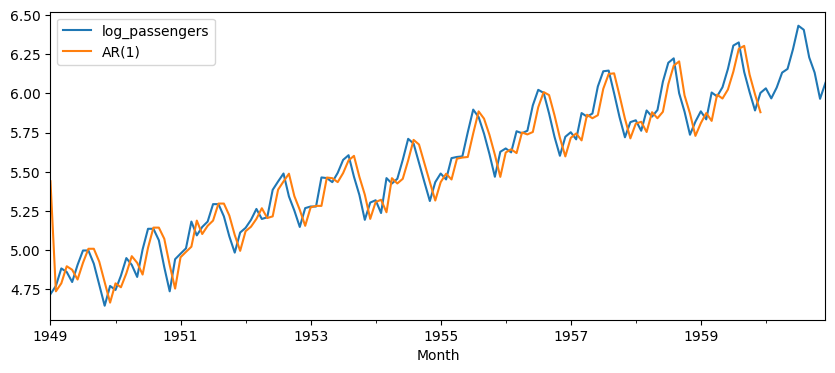

In [43]:
##plot comparison between fitted values and original
df[['log_passengers','AR(1)']].plot(figsize=(10,4))

In [44]:
##the naive forecast can act as a baseline model

In [45]:
test_pred = arima_result.get_forecast(steps=test_period)
forecast = test_pred.predicted_mean
df.loc[test_idx,'AR(1)'] = forecast

In [46]:
df.tail()

,#Passengers,passengers_diff,log_passengers,log_passengers_diff,passengers_diff_2,log_passengers_diff_2,AR(1)
Month,,,,,,,
1960-08-01,606,-16.0,6.406880,-0.026060,-103.0,-0.176733,5.901289
1960-09-01,508,-98.0,6.230481,-0.176399,-82.0,-0.150338,5.889852
1960-10-01,461,-47.0,6.133398,-0.097083,51.0,0.079315,5.878699
1960-11-01,390,-71.0,5.966147,-0.167251,-24.0,-0.070168,5.867822
1960-12-01,432,42.0,6.068426,0.102279,113.0,0.269530,5.857214


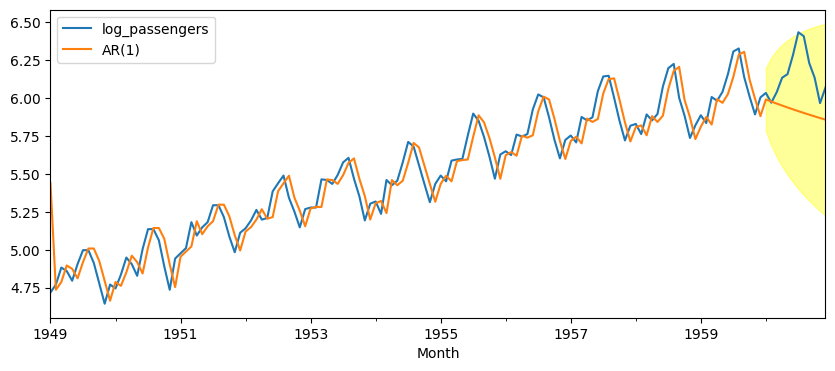

In [47]:
df[['log_passengers','AR(1)']].plot(figsize=(10,4))
plt.fill_between(test_data.index,test_pred.conf_int().iloc[:,0],test_pred.conf_int().iloc[:,1],color='yellow',alpha=0.4)

In [48]:
##get confidence intervals
test_pred.conf_int()

,lower log_passengers,upper log_passengers
1960-01-01,5.782030,6.197786
1960-02-01,5.685911,6.266641
1960-03-01,5.611700,6.314263
1960-04-01,5.549300,6.350732
1960-05-01,5.494734,6.380010
1960-06-01,5.445925,6.404158
1960-07-01,5.401614,6.424418
1960-08-01,5.360969,6.441609
1960-09-01,5.323397,6.456308
1960-10-01,5.288460,6.468938


In [49]:
len(train_data.index)

132

In [55]:
#define function to take train_predictions and test predictions as well orginal data
def plot_fitted_values(predictions,col:str,alpha:float,test_period:int=12):
    fig,ax = plt.subplots(figsize=(15,4))
    ax.plot(df[col],label='orginal_data')

    #plot train predictions
    train_pred = predictions.predict(start=train_data.index[0],end=train_data.index[-1])
    ax.plot(train_data.index,train_pred,color='green',label='fitted/trainpreds')

    #plot test predictions
    test_preds = predictions.get_forecast(steps=test_period)
    forecast = test_preds.predicted_mean
    lower,upper = test_preds.conf_int().iloc[:,0][:test_period],test_preds.conf_int().iloc[:,1][:test_period]
    ax.plot(test_data.index[:test_period],forecast[:test_period],label='forecast',color='red')
    ax.fill_between(test_data.index[:test_period],lower,upper,color='yellow',alpha=alpha)
    ax.legend()
    ax.grid(visible=True)

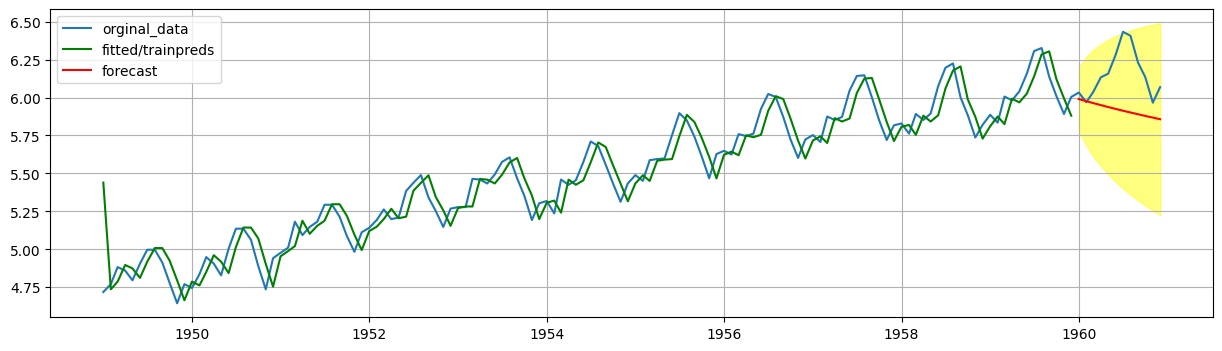

In [56]:
##test function
plot_fitted_values(arima_result,col='log_passengers',alpha=0.5,test_period=12)

In [52]:
##the function above takes the arima fitted object and predicts the in-sample data as well the out-sample-data
##clearly the AR(1) model did not forecast well at all

In [57]:
##AR(p) where is the number of past data
##knowing that the d=2 produces stationarity, lets test ARIMA(1,2,0)

arima_result_120 = ARIMA(train_data,order=(1,2,0)).fit()

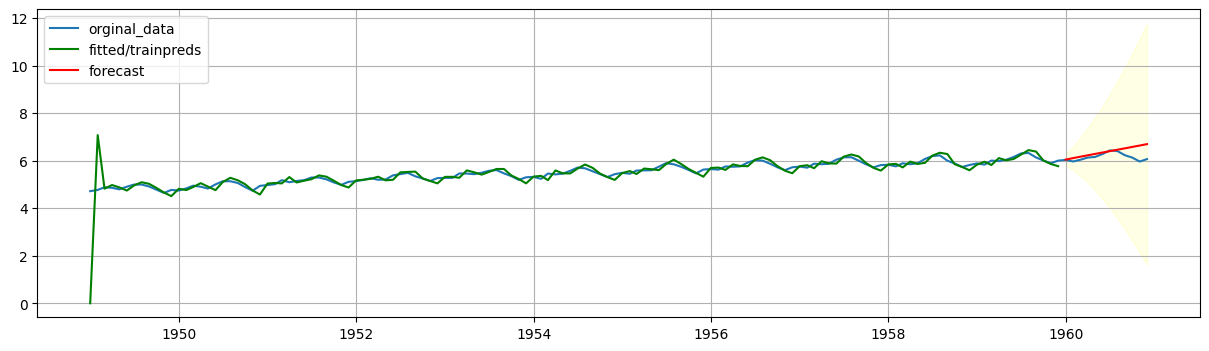

In [58]:
##plot
plot_fitted_values(arima_result_120,col='log_passengers',alpha=0.1,test_period=12)

In [60]:
##introducing the d=2 produced a more flatter and possible stationary series.

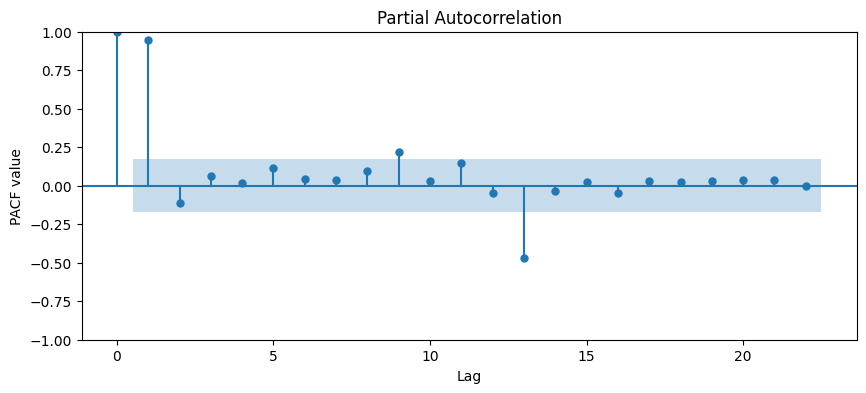

In [59]:
##we can also manually figure out the values for the p and q respectively using the pacf and acf plots
#for the P value, the right function is the PACF=Partial AutoCorrelaton Function

fig,ax = plt.subplots(figsize=(10,4))
plot_pacf(x=train_data,ax=ax,lags=None)
plt.xlabel('Lag')
plt.ylabel('PACF value');

In [61]:
##from the plot, the value of p=2

In [62]:
train_data.head()

,log_passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791


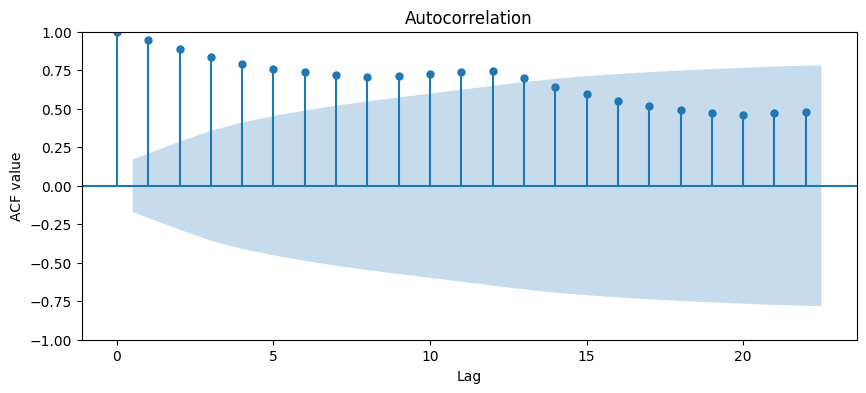

In [63]:
##check for the Q value
fig,ax = plt.subplots(figsize=(10,4))
plot_acf(x=train_data,ax=ax,lags=None)
plt.xlabel('Lag')
plt.ylabel('ACF value');

In [64]:
##test ARIMA(2,2,2)
arima_result_222 = ARIMA(train_data,order=(2,1,2)).fit()

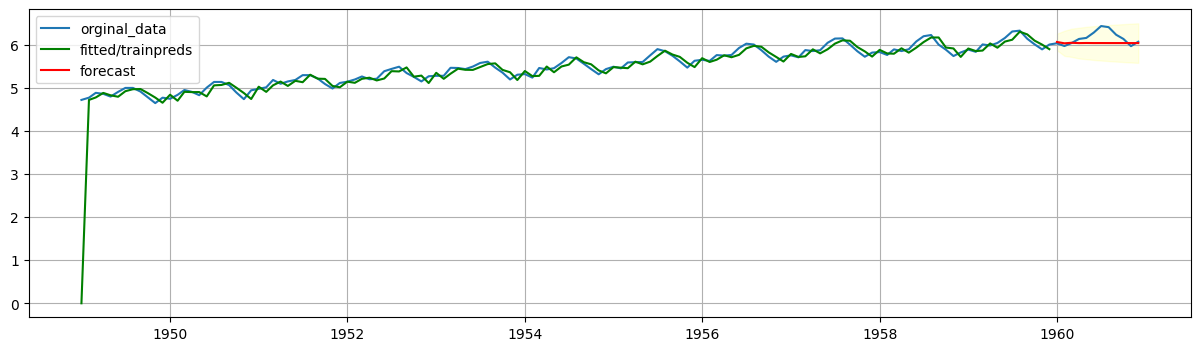

In [65]:
plot_fitted_values(arima_result_222,col='log_passengers',alpha=0.1,test_period=12)

In [66]:
##test ARIMA(12,2,2)
arima_result_1222 = ARIMA(train_data,order=(12,2,2)).fit()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


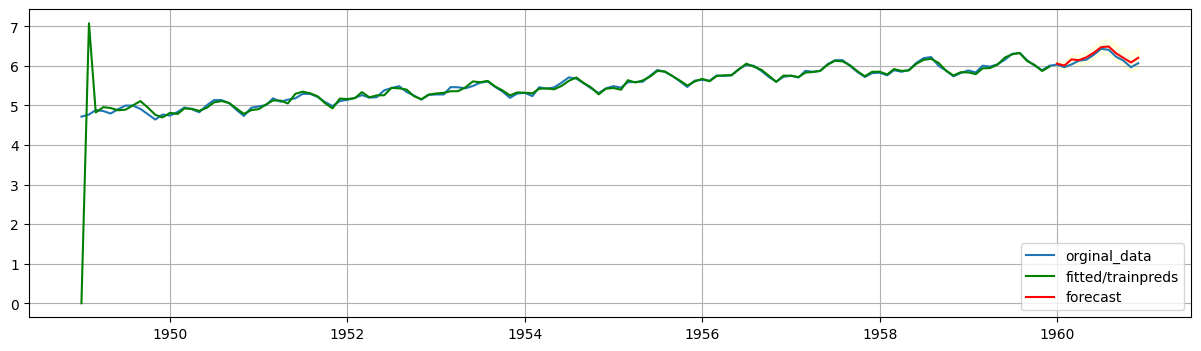

In [67]:
plot_fitted_values(arima_result_1222,col='log_passengers',alpha=0.1,test_period=12)

In [201]:
##using  AUTO ARIMA to find the best model